In [3]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

def figure3d(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, subplot_kw={"projection": "3d"}, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [4]:
from ipywidgets import FloatSlider, HBox, Text
import numpy.fft as ft

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

# Aufgabe 1

FloatSlider(value=1.0, description='k: ', max=2.0, min=0.1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
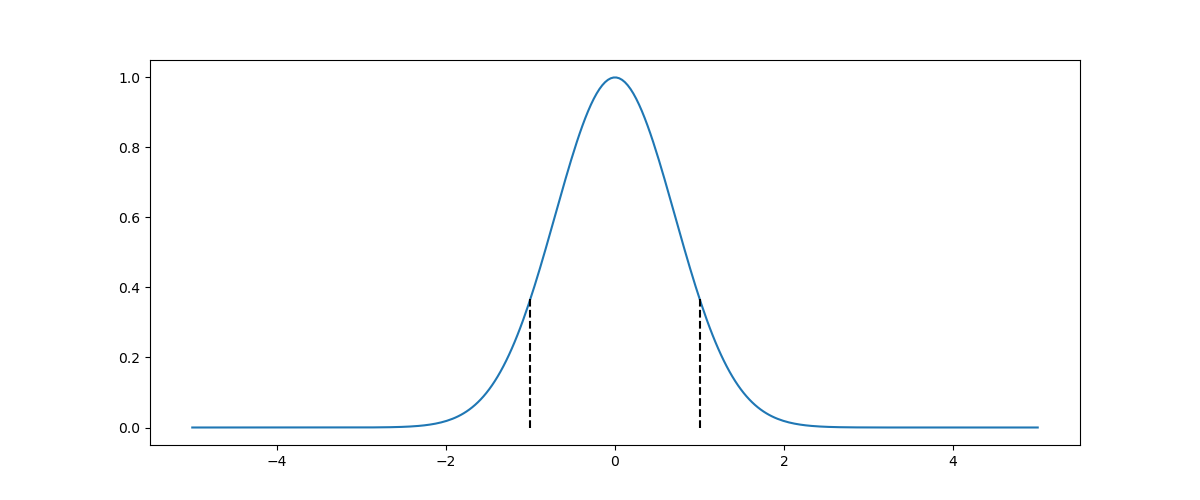

In [6]:
def get_slider():
    sw = FloatSlider(
        orientation='horizontal', description='k: ',
        value=1, min=.1, max=2, step = 0.1
    )

    w = sw.value
    x = np.linspace(-5, 5, 300)
    
    fig, ax = figure('a1', 1, 1, figsize=(12, 5))
    lines = []
    lines.append(ax.plot(x, np.exp(-x**2/w**2))[0])
    lines.append(ax.plot([-w, -w], [0, np.exp(-1)], 'k--')[0])
    lines.append(ax.plot([w, w], [0, np.exp(-1)], 'k--')[0])


    def redraw(change):
        w = sw.value        
        lines[0].set_data(x, np.exp(-x**2/w**2))
        lines[1].set_data([-w, -w], [0, np.exp(-1)])
        lines[2].set_data([w, w], [0, np.exp(-1)])

        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sw.observe(redraw, names='value')
    return sw

get_slider()

In [1]:
N = 100
Nt = 10000
t = np.linspace(0, N, Nt, endpoint=False)
func = 0.5 * (.31 + np.cos(2*np.pi*t + np.pi) + 0.94*np.cos(2*2*np.pi*t + np.pi) + 0.72*np.cos(3*2*np.pi*t + np.pi)  - 0.52*np.cos(4*2*np.pi*t + np.pi))
ft_func = ft.fftshift(ft.fft(func))
f = ft.fftshift(ft.fftfreq(Nt, d=t[1]))
fig, ax = figure(1, 1, 2)
ax[0].plot(t, func)
ax[1].plot(f, np.abs(ft_func))
ax[0].set_xlim([-.1, 5.1])
ax[1].set_xlim([-5, 5])

NameError: name 'np' is not defined

In [2]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=np.pi, min=.1, max=4*np.pi, step = np.pi/10
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=20, step = 0.1
    )
    ft_func = ft.fftshift(ft.fft(func))
    f = ft.fftshift(ft.fftfreq(Nt, d=t[1]))
    k = sk.value
    z = sz.value
    fac = np.exp(1j * np.sqrt(k**2 - f.astype(np.complex)**2) * z)
    w = f.astype(np.complex)
    

    fig, ax = figure(4, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(t, ft.ifft(ft.ifftshift(ft_func)))[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])

    ax[0].set_xlim([-.1, 5.1])        
    ax[0].set_ylim([-2.05, 2.05])
    ax[1].set_ylim([-1.05, 1.05])
    ax[1].set_xlim([-5.6, 5.6])
    
    def redraw(change):
        k = sk.value
        z = sz.value
        fac = np.exp(1j * np.sqrt(k**2 - w**2) * z)
        
        lines[0].set_data(t, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))

        lines[1].set_data(f, np.real(fac))
        lines[2].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    return HBox([sk, sz])

get_slider()

NameError: name 'FloatSlider' is not defined

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
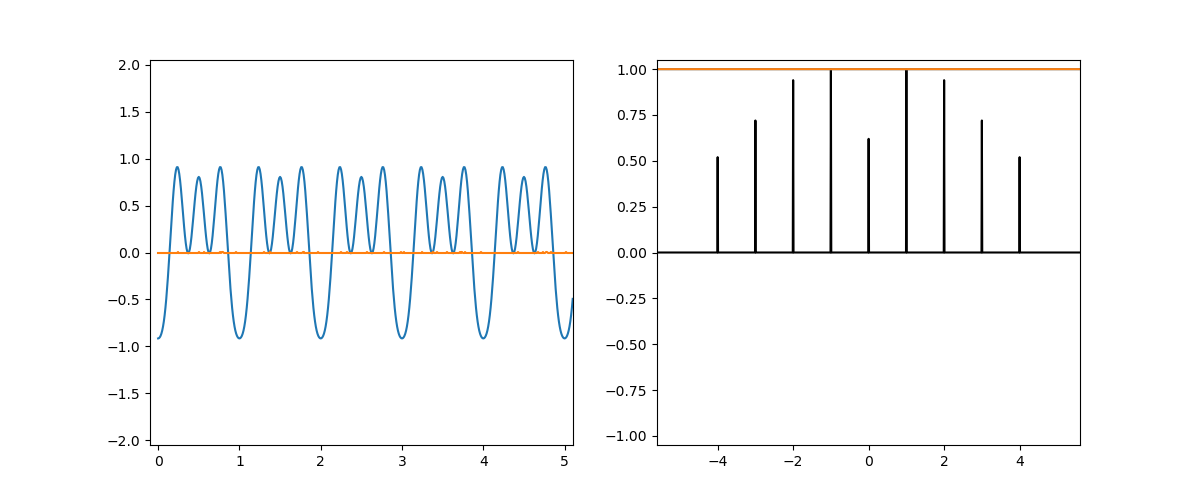

In [9]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=np.pi, min=.1, max=4, step = 0.1
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=20, step = 0.1
    )
    text = Text()

    ft_func = ft.fftshift(ft.fft(func))
    f = ft.fftshift(ft.fftfreq(Nt, d=t[1]))
    k = sk.value
    z = sz.value
    fac = np.exp(1j * np.sqrt(k**2 - f.astype(np.complex)**2/(2*k)) * z)
    text.value = f'{k/np.pi:.6f}'
    w = f.astype(np.complex)*2*np.pi
    fig, ax = figure(2, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(t, ft.ifft(ft.ifftshift(ft_func)))[0])
    lines.append(ax[0].plot(t, ft.ifft(ft.ifftshift(ft_func)).imag)[0])

    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])


    ax[0].set_xlim([-.1, 5.1])        
    ax[0].set_ylim([-2.05, 2.05])
    ax[1].set_ylim([-1.05, 1.05])
    ax[1].set_xlim([-5.6, 5.6])
    
    def redraw(change):
        k = sk.value
        z = sz.value
        fac = np.exp(1j * (k - w**2/(2*k)) * z)

        text.value = f'{k/np.pi:.6f}'
        lines[0].set_data(t, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))
        lines[1].set_data(t, np.imag(ft.ifft(ft.ifftshift(ft_func*fac))))

        lines[2].set_data(f, np.real(fac))
        lines[3].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    return HBox([sk, sz, text])

get_slider()

In [10]:
k = np.pi*4.5
z = np.linspace(0, 6.5, 1000)
w = f[:, np.newaxis].astype(np.complex)*2*np.pi
fac1 = np.exp(1j * np.sqrt(k**2 - w**2) * z[np.newaxis, :])
fac2 = np.exp(1j * (k - w**2/(2*k)) * z[np.newaxis, :])
ft_func_2d1 = ft.ifft(ft.ifftshift(ft_func[:, np.newaxis]*fac1, axes=0), axis=0)
ft_func_2d2 = ft.ifft(ft.ifftshift(ft_func[:, np.newaxis]*fac2, axes=0), axis=0)

Z, X = np.meshgrid(z, t)

Text(0, 0.5, 'x')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
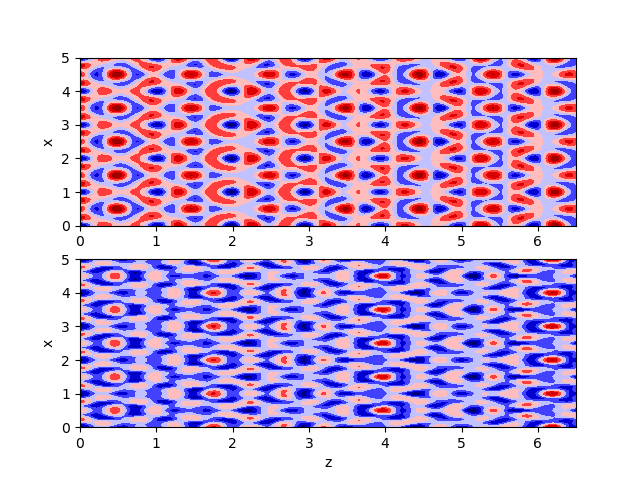

In [11]:
fig, ax = figure(123, 2, 1)
ax[0].contourf(Z, X, np.real(ft_func_2d1), cmap=plt.cm.seismic)
ax[0].set_ylim([0, 5])

ax[1].contourf(Z, X, np.real(ft_func_2d2), cmap=plt.cm.seismic)
ax[1].set_ylim([0, 5])
ax[1].set_xlabel('z')
ax[0].set_ylabel('x')
ax[1].set_ylabel('x')